# K-Means Clustering from Scratch

## Download Dataset

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [79]:
warnings.filterwarnings("ignore")

## Working with Dummy Data

In [80]:
seed = 105

### Generate Dummy Data

In [81]:
np.random.seed(seed)

cluster_1 = np.random.normal(loc=[6,6], scale=1, size=(50,2))
cluster_2 = np.random.normal(loc=[4,4], scale=1, size=(50,2))
cluster_3 = np.random.normal(loc=[2,7], scale=1, size=(50,2))

cluster_1.shape

(50, 2)

In [82]:
features = np.vstack([cluster_1, cluster_2, cluster_3])

features.shape

(150, 2)

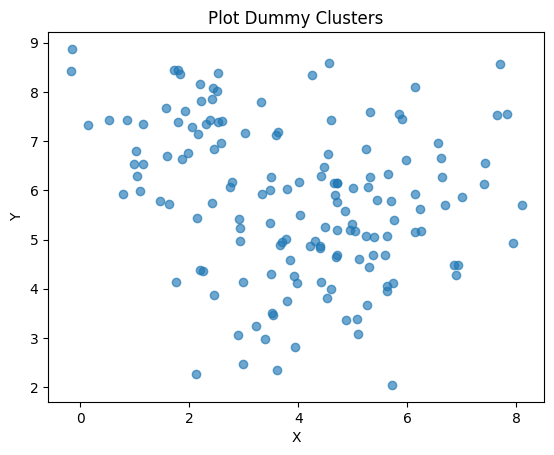

In [83]:
plt.scatter(features[:, 0], features[:, 1], alpha=0.65)
plt.title('Plot Dummy Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1. Initialise Random Centroids

We have pick the centroids from the list of points we have in our dataset

In [84]:
def init_centroids(num_centroids):
    
    np.random.seed(seed)
    centroid_indices = np.random.choice(features.shape[0], size=num_centroids, replace=False) # randomly pick indices from 0 - 150
    return features[centroid_indices]

In [85]:
centroids = init_centroids(3)

centroids

array([[2.42400568, 7.84677762],
       [4.60905591, 4.00315323],
       [5.72881881, 4.11712408]])

In [86]:
def plot_centroids(centroids):

    plt.figure(figsize=(8,6))

    plt.scatter(features[:, 0], features[:, 1], c='blue', alpha=0.5, label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
    plt.title(f"Number of Centroids = 3")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()

    plt.tight_layout()
    plt.show()   

In [87]:
def plot_clusters(centroids, feature_assignment):
    plt.figure(figsize=(8, 6))
    
    colors = plt.cm.tab10(range(len(centroids)))  # colormap to generate distinct colors

    for i, cluster_points in enumerate(feature_assignment):
        cluster_points = np.array(cluster_points)  # Convert to NumPy array
        if len(cluster_points) > 0:  # Only plot if the cluster is not empty
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], alpha=0.6, label=f"Cluster {i + 1}")
    
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label="Centroids")
    
    plt.title(f"Clusters with Centroids")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.tight_layout()
    plt.show()


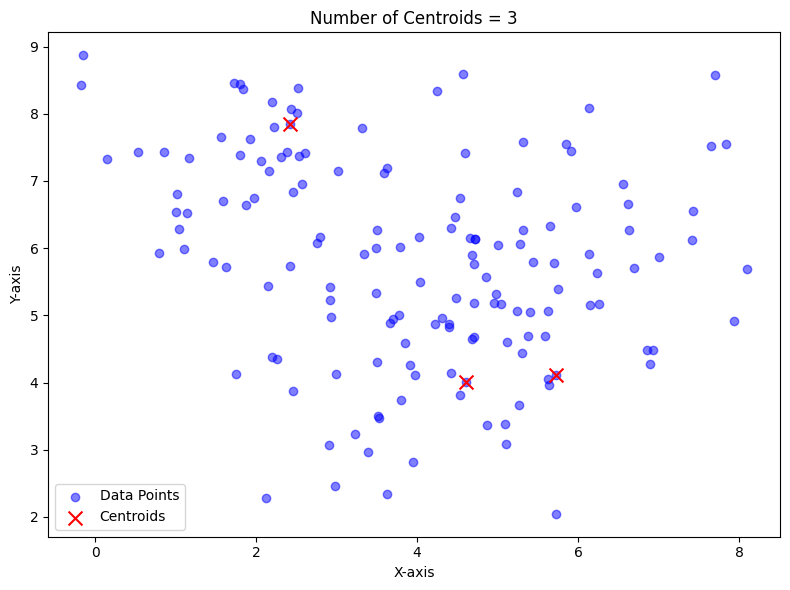

In [88]:
plot_centroids(centroids)

### 2. Assign Points to Cluster

For each feature take Eucledian Distance and pick the centroid which is closest to the point

In [89]:
def assign_points_to_cluster(centroids, features):

    feature_assignment = [[] for _ in range(len(centroids))]

    for f in features:
        distances = []
        for c in centroids:
            distances.append(np.linalg.norm(f - c))

        closest_centroid_idx = np.argmin(distances)
        feature_assignment[closest_centroid_idx].append(f)
    
    return feature_assignment

### 3. Recalculate Cluster Position

Take a look at all the points assigned to particular clusters and recalcuate the centroids for each of the cluster

In [90]:
def calculate_position(feature_assingment):
    
    new_centroids = []

    for cluster in feature_assingment:
        
        if len(cluster) > 0:
            new_centroids.append(np.mean(cluster, 0))
        else:
            new_centroids.append(None)

    return np.array(new_centroids)

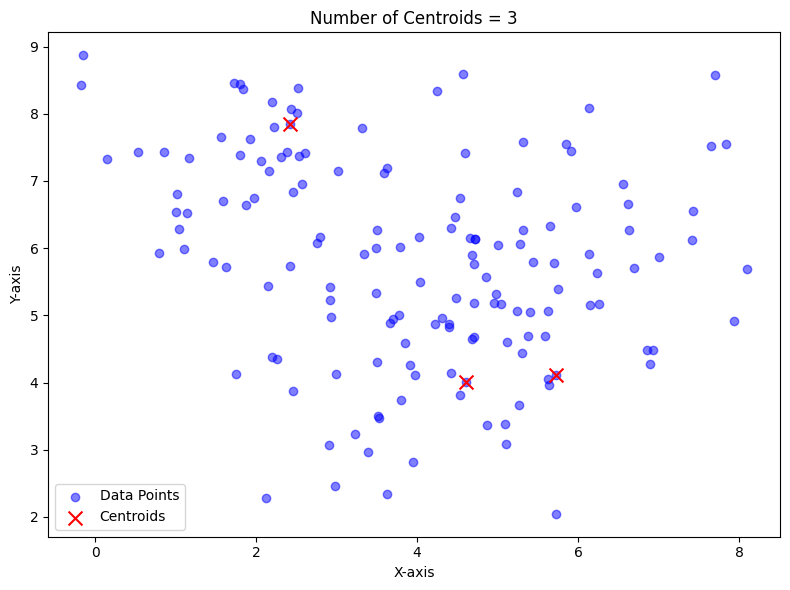

In [91]:
plot_centroids(centroids)

Iteration 1


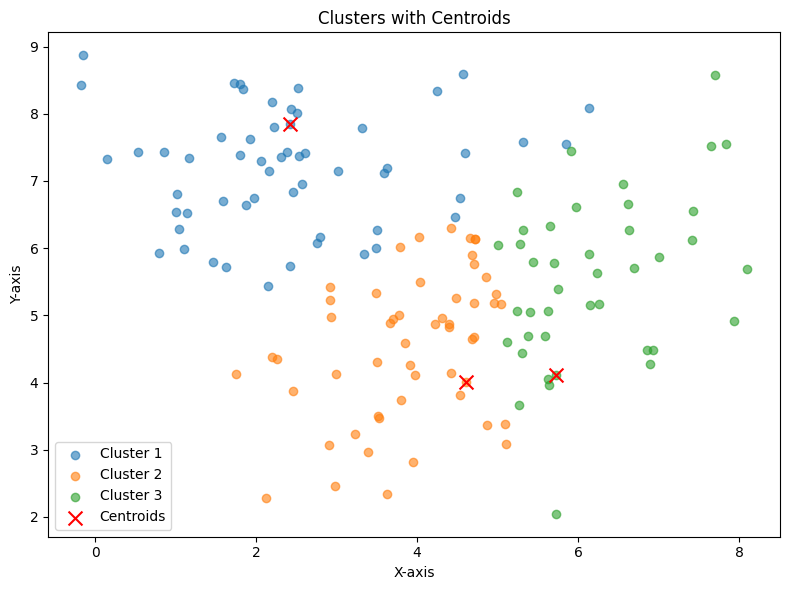

Iteration 2


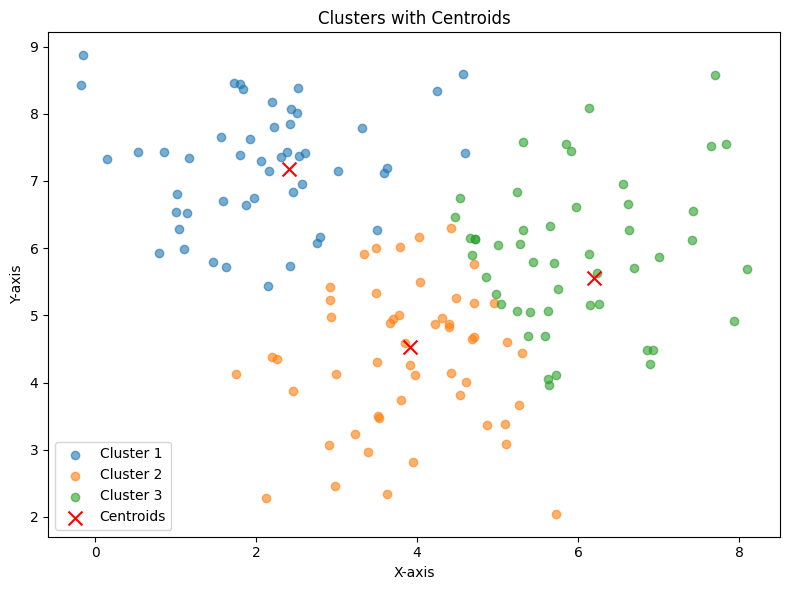

Iteration 3


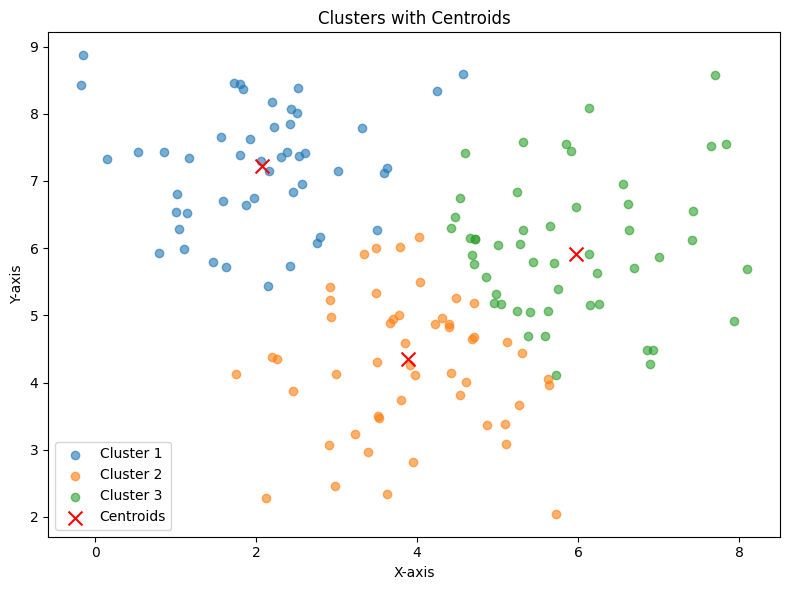

Iteration 4


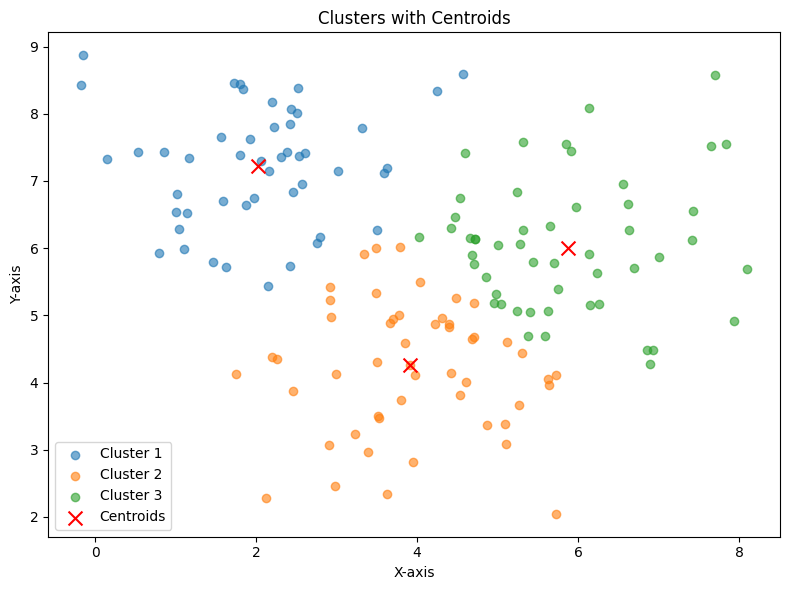

Iteration 5


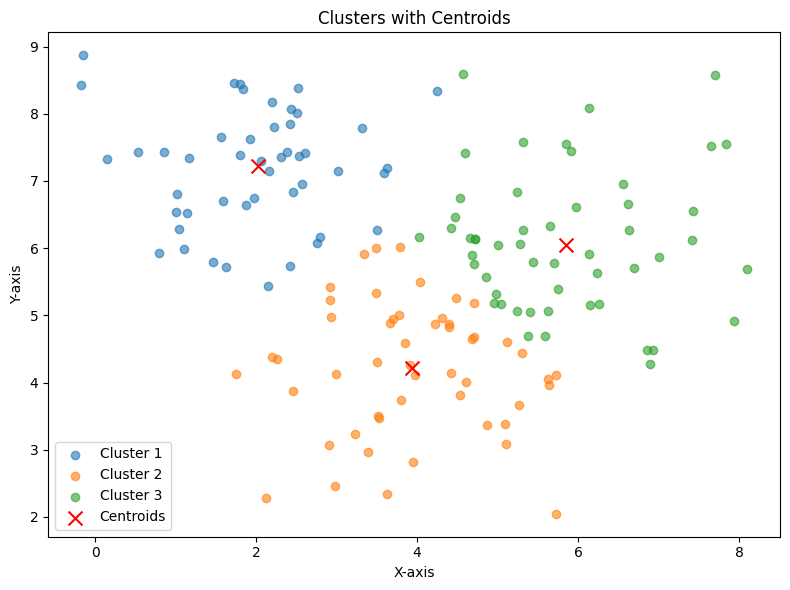

Iteration 6


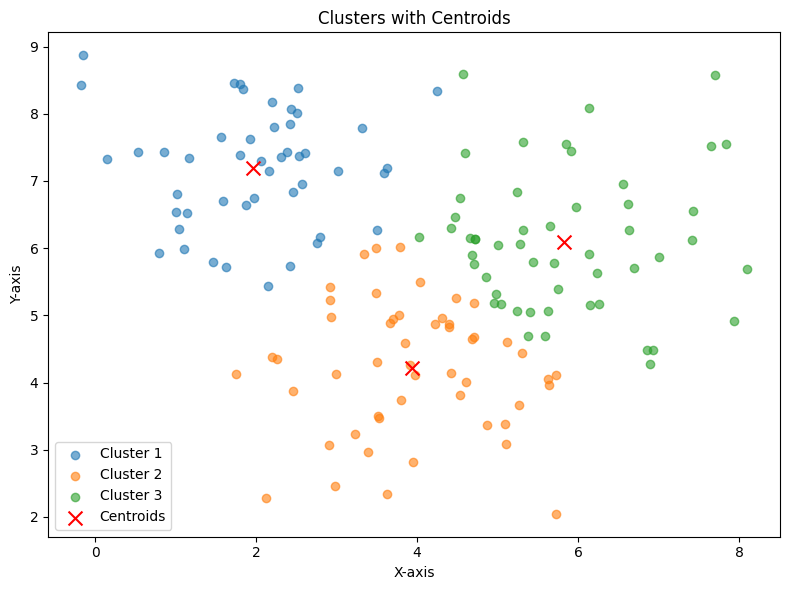

Centroids stabilized.
Final Centroids:
 [[1.96523146 7.18686088]
 [3.93873546 4.22146745]
 [5.82278587 6.09358391]]


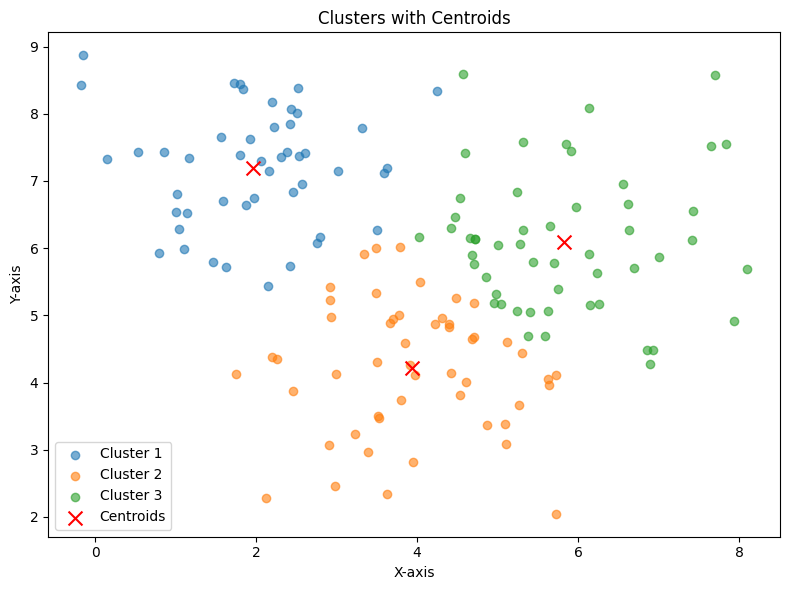

In [92]:
max_iterations = 100
tolerance = 1e-4  # Small tolerance to check centroid movement

# Initialize centroids randomly
centroids = init_centroids(3)
feature_assingment = None

for iteration in range(max_iterations):
    print(f"Iteration {iteration + 1}")
    
    # Step 1: Assign points to the closest centroid
    feature_assingment = assign_points_to_cluster(centroids, features)
    
    # Step 2: Recalculate centroids
    new_centroids = calculate_position(feature_assingment=feature_assingment)

    plot_clusters(centroids, feature_assingment)
    
    # Step 3: Check for convergence
    if np.allclose(centroids, new_centroids, atol=tolerance):
        print("Centroids stabilized.")
        break 
    
    # Step 4: Update centroids for the next iteration
    centroids = new_centroids
    
print("Final Centroids:\n", centroids)

plot_clusters(centroids, feature_assingment)

## Calculate Silhouette Score

In [93]:
def euclidean_distance(p, q):
    return np.linalg.norm(p - q)


In [94]:

def silhouette_score_manual(clusters):
    all_scores = []
    
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            # Intra-cluster distance (a(i))
            intra_cluster_distances = [euclidean_distance(point, other) for other in cluster if not np.array_equal(point, other)]
            a = np.mean(intra_cluster_distances) 
            
            # Nearest-cluster distance (b(i))
            inter_cluster_distances = []
            for other_cluster_idx, other_cluster in enumerate(clusters):
                if other_cluster_idx != cluster_idx:
                    inter_cluster_distances.append(np.mean([euclidean_distance(point, other) for other in other_cluster]))
            b = min(inter_cluster_distances) 
            
            # Silhouette score for the point
            s = (b - a) / max(a, b)
            all_scores.append(s)
    
    return np.mean(all_scores)

In [95]:
silhouette = silhouette_score_manual(feature_assingment)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.41136186138792297
